In [ ]:
pip install etna -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 477.9/477.9 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 61.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 99.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 52.4 MB/s eta 0:00:00
   ━━━━━━

# Установка библиотек

In [84]:
from etna.datasets import TSDataset
from etna.metrics import SMAPE, MAE, MSE, MAPE
from etna.models import (
    AutoARIMAModel,
    ProphetModel,
    SARIMAXModel,
    CatBoostMultiSegmentModel,
    LinearPerSegmentModel,
    ElasticMultiSegmentModel,
    HoltModel,
    SeasonalMovingAverageModel,
)
from etna.pipeline import Pipeline
from etna.transforms import (
    DateFlagsTransform,
    LagTransform,
    FourierTransform,
    RobustScalerTransform,
    SegmentEncoderTransform,
)
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

import importlib
from etna.datasets import TSDataset
from etna.metrics import SMAPE, MAE, MSE
from etna.pipeline import Pipeline
from etna.transforms import (
    DensityOutliersTransform,
    DateFlagsTransform,
    LagTransform,
    RobustScalerTransform,
    FourierTransform,
    SegmentEncoderTransform,
    TreeFeatureSelectionTransform,
)
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import importlib
from etna.datasets import TSDataset
from etna.metrics import SMAPE, MAE, MSE
from etna.pipeline import Pipeline
from etna.transforms import (
    DensityOutliersTransform,
    DateFlagsTransform,
    LagTransform,
    RobustScalerTransform,
    FourierTransform,
    SegmentEncoderTransform,
    TreeFeatureSelectionTransform,
)
import pandas as pd
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet
from etna.datasets import TSDataset
from etna.models import ProphetModel
from etna.pipeline import Pipeline
from etna.metrics import MAE, MSE, SMAPE

# Для воспроизводимости результатов
np.random.seed(42)

# Выгрузка данных

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Загружаем все три файла
dates_df = pd.read_csv('/content/drive/MyDrive/shop_sales_dates.csv')
prices_df = pd.read_csv('/content/drive/MyDrive/shop_sales_prices.csv')
sales_df = pd.read_csv('/content/drive/MyDrive/shop_sales.csv')

# Предобработка данных

In [174]:
import pandas as pd
from etna.datasets import TSDataset

def aggregate(df: pd.DataFrame, granularity: int) -> TSDataset:
    """
    Агрегирует данные по заданной гранулярности (1 = день, 7 = неделя, 30 = месяц) и возвращает их в формате TSDataset.

    Параметры:
    - df: DataFrame с данными временных рядов.
    - granularity: число, определяющее гранулярность (1 - день, 7 - неделя, 30 - месяц).

    Возвращает:
    - Агрегированный TSDataset.
    """
    # Определяем частоту на основе переданного значения гранулярности
    if granularity == 1:
        freq = 'D'  # день
    elif granularity == 7:
        freq = 'W'  # неделя
    elif granularity == 30:
        freq = 'M'  # месяц
    else:
        raise ValueError("Гранулярность должна быть равна 1 (день), 7 (неделя) или 30 (месяц).")

    # Преобразуем DataFrame в формат TSDataset с дневной частотой
    tsdataset = TSDataset.to_dataset(df)

    # Применяем ресемплинг и агрегацию
    resampled_data = tsdataset.resample(freq).sum()

    # Возвращаем агрегированный TSDataset с заданной частотой
    aggregated_tsdataset = TSDataset(resampled_data, freq=freq)

    return aggregated_tsdataset


In [177]:
merged_df.item_id.unique()

array(['STORE_2_085', 'STORE_2_043', 'STORE_2_054', 'STORE_2_325',
       'STORE_2_090', 'STORE_2_252', 'STORE_2_376', 'STORE_2_391',
       'STORE_2_524', 'STORE_2_555', 'STORE_2_586', 'STORE_2_587',
       'STORE_2_681', 'STORE_2_714', 'STORE_2_716', 'STORE_3_012',
       'STORE_3_114', 'STORE_3_357', 'STORE_3_360', 'STORE_3_090',
       'STORE_3_169', 'STORE_3_222', 'STORE_3_252', 'STORE_3_358',
       'STORE_3_389', 'STORE_3_555', 'STORE_3_586', 'STORE_3_587',
       'STORE_3_714', 'STORE_3_804', 'STORE_1_064', 'STORE_1_065',
       'STORE_1_325', 'STORE_1_376', 'STORE_1_090', 'STORE_1_252',
       'STORE_1_339', 'STORE_1_546', 'STORE_1_547', 'STORE_1_555',
       'STORE_1_584', 'STORE_1_586', 'STORE_1_587', 'STORE_1_714',
       'STORE_1_727'], dtype=object)

In [243]:
merged_df = sales_df.merge(dates_df, on='date_id', how='left')
final_merged_df = merged_df.merge(prices_df, on=['store_id', 'item_id', 'wm_yr_wk'], how='left')

# Выбор конкретных товаров для эксперимента
selected_items = ['STORE_1_727'], 'STORE_2_043']
final_merged_df = final_merged_df[final_merged_df['item_id'].isin(selected_items)]

In [244]:
final_merged_df.head()

item_id store_id  date_id  cnt        date  wm_yr_wk    weekday  \
80036  STORE_1_727  STORE_1        1    6  2011-01-29     11101   Saturday   
80037  STORE_1_727  STORE_1        2    8  2011-01-30     11101     Sunday   
80038  STORE_1_727  STORE_1        3    6  2011-01-31     11101     Monday   
80039  STORE_1_727  STORE_1        4    0  2011-02-01     11101    Tuesday   
80040  STORE_1_727  STORE_1        5    2  2011-02-02     11101  Wednesday   

       wday  month  year event_name_1 event_type_1 event_name_2 event_type_2  \
80036     1      1  2011          NaN          NaN          NaN          NaN   
80037     2      1  2011          NaN          NaN          NaN          NaN   
80038     3      1  2011          NaN          NaN          NaN          NaN   
80039     4      2  2011          NaN          NaN          NaN          NaN   
80040     5      2  2011          NaN          NaN          NaN          NaN   

       CASHBACK_STORE_1  CASHBACK_STORE_2  CASHBACK_STORE_3  sell_price  
80036                 0                 0                 0        3.98  
80037                 0                 0                 0        3.98  
80038                 0                 0                 0        3.98  
80039                 0                 1                 1        3.98  
80040                 1                 1                 0        3.98

In [193]:
target_name, date_name, segment_name, granularity   = 'cnt', 'date', 'item_id', 30

df = final_merged_df
df["timestamp"] = df[date_name]
df["segment"] = df[segment_name]
df["target"] = df[target_name]
df = df[['timestamp', 'segment', 'target']]

In [194]:
df.head()

timestamp      segment  target
1819  2011-01-29  STORE_2_043       6
1820  2011-01-30  STORE_2_043       0
1821  2011-01-31  STORE_2_043       0
1822  2011-02-01  STORE_2_043       1
1823  2011-02-02  STORE_2_043       0

In [195]:
ts = aggregate(df, granularity=granularity)

In [196]:
ts.head()

segment    STORE_1_727 STORE_2_043
feature         target      target
timestamp                         
2011-01-31          20           6
2011-02-28          59          21
2011-03-31           0          22
2011-04-30           0          22
2011-05-31           0          16

In [197]:
# Разделение на обучающую и тестовую выборки
train_ts, test_ts = ts.train_test_split(test_size=10)

# Обучение на нескольких сегментах

In [198]:
HORIZON = 10

In [199]:
from etna.models import ProphetModel

# Define a model
model = ProphetModel()

# Define a pipeline
pipeline = Pipeline(model=model, horizon=HORIZON)

# Fit the pipeline
pipeline.fit(train_ts)

# Make a forecast
forecast_ts = pipeline.forecast()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy6nhwxsd/soiprfva.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy6nhwxsd/isxj09kj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27891', 'data', 'file=/tmp/tmpy6nhwxsd/soiprfva.json', 'init=/tmp/tmpy6nhwxsd/isxj09kj.json', 'output', 'file=/tmp/tmpy6nhwxsd/prophet_modellqgdf7k0/prophet_model-20240913051824.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
05:18:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:18:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonali

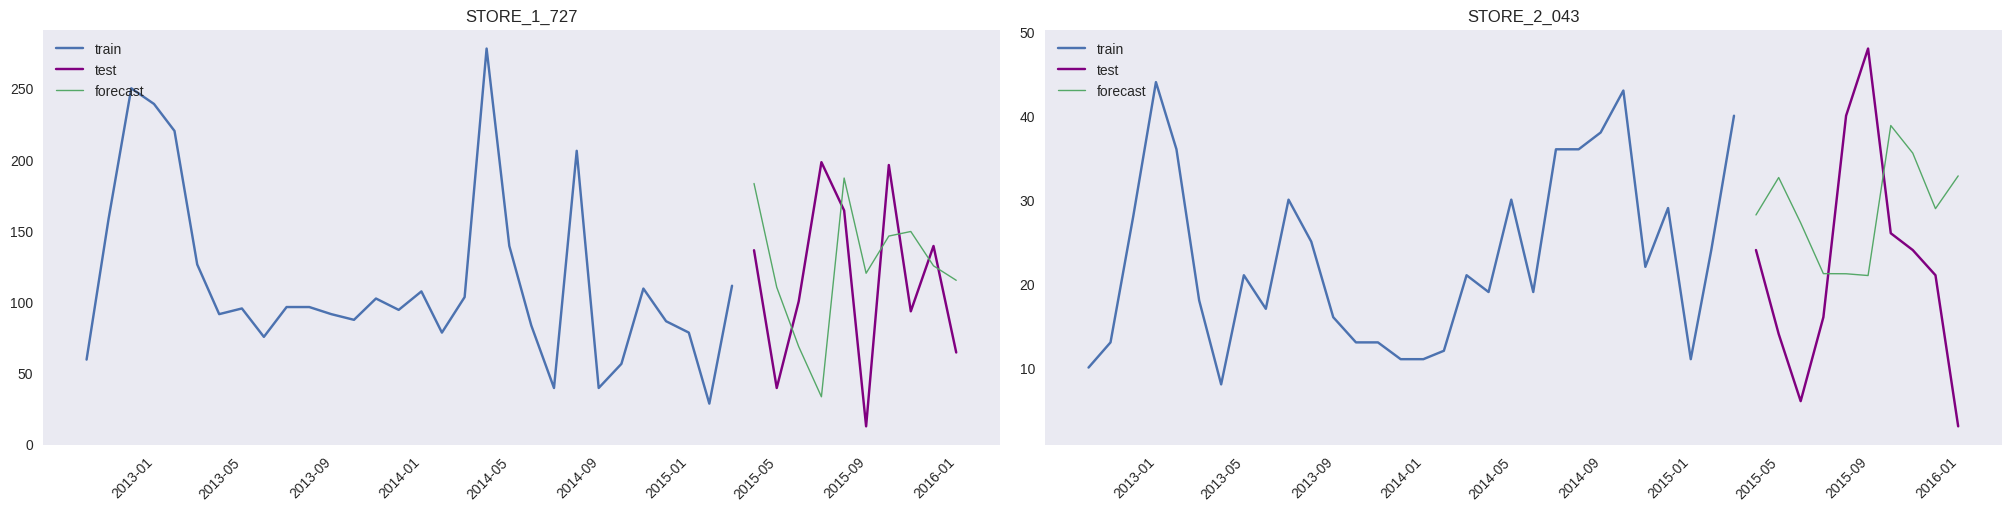

In [200]:
plot_forecast(forecast_ts=forecast_ts, test_ts=test_ts, train_ts=train_ts, n_train_samples=30)

In [204]:
many_segments = MAE(y_true=test_ts, y_pred=forecast_ts)
many_segments

{'STORE_1_727': 61.663900670354145, 'STORE_2_043': 15.72441118472872}

#Обучение на одном сегменте

In [246]:
# Выбор конкретных товаров для эксперимента

selected_items = ['STORE_1_727']
final_merged_df = merged_df.merge(prices_df, on=['store_id', 'item_id', 'wm_yr_wk'], how='left')
final_merged_df = final_merged_df[final_merged_df['item_id'].isin(selected_items)]

target_name, date_name, segment_name, granularity   = 'cnt', 'date', 'item_id', 30

df = final_merged_df
df["timestamp"] = df[date_name]
df["segment"] = df[segment_name]
df["target"] = df[target_name]
df = df[['timestamp', 'segment', 'target']]

ts = aggregate(df, granularity=granularity)
train_ts, test_ts = ts.train_test_split(test_size=10)

In [251]:
ts = aggregate(df, granularity=granularity)

In [252]:
# Разделение на обучающую и тестовую выборки
train_ts, test_ts = ts.train_test_split(test_size=10)

In [253]:
from etna.models import ProphetModel

# Define a model
model = ProphetModel()

# Define a pipeline
pipeline = Pipeline(model=model, horizon=HORIZON)

# Fit the pipeline
pipeline.fit(train_ts)

# Make a forecast
forecast_ts = pipeline.forecast()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy6nhwxsd/3f5r_wsg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy6nhwxsd/8ft3uuug.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81082', 'data', 'file=/tmp/tmpy6nhwxsd/3f5r_wsg.json', 'init=/tmp/tmpy6nhwxsd/8ft3uuug.json', 'output', 'file=/tmp/tmpy6nhwxsd/prophet_modelvhgmhsff/prophet_model-20240913054101.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
05:41:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:41:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


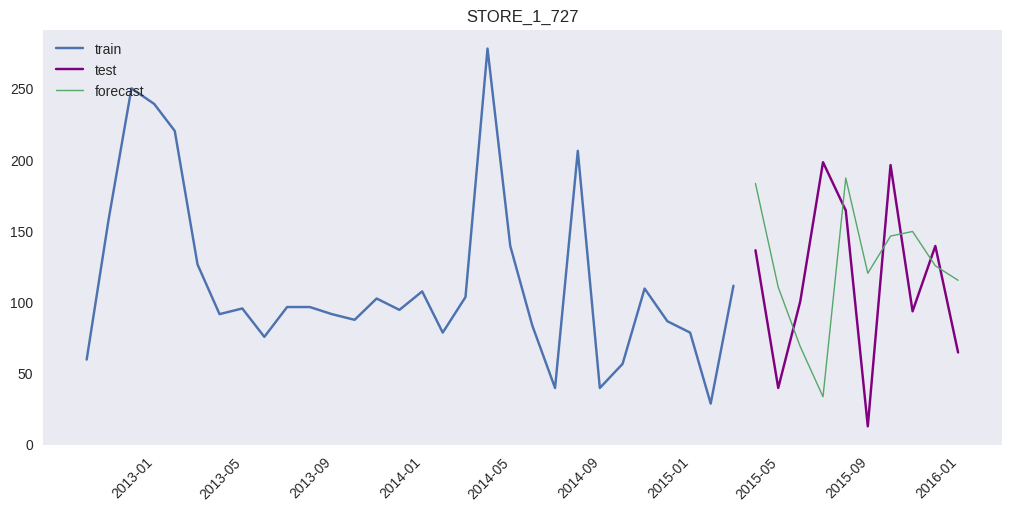

In [254]:
plot_forecast(forecast_ts=forecast_ts, test_ts=test_ts, train_ts=train_ts, n_train_samples=30)

In [255]:
one_segment = MAE(y_true=test_ts, y_pred=forecast_ts)
one_segment

{'STORE_1_727': 61.663900670354145}

In [256]:
many_segments

{'STORE_1_727': 61.663900670354145, 'STORE_2_043': 15.72441118472872}

In [ ]:
'STORE_1_727': 61.663900670354145 = 'STORE_1_727': 61.663900670354145

### **Вывод:** Если модель не предназначена для мультимодальности, то без разницы обучать ее на всем датасете или на отдельном сегменте.

# Мультимодальные модели

### Мультимодальные модели, которые предполагают обучение на всем датасете, где sku - фичи

In [276]:
final_merged_df = merged_df.merge(prices_df, on=['store_id', 'item_id', 'wm_yr_wk'], how='left')
final_merged_df

item_id store_id  date_id  cnt        date  wm_yr_wk    weekday  \
0      STORE_2_085  STORE_2        1    3  2011-01-29     11101   Saturday   
1      STORE_2_085  STORE_2        2    8  2011-01-30     11101     Sunday   
2      STORE_2_085  STORE_2        3    0  2011-01-31     11101     Monday   
3      STORE_2_085  STORE_2        4    3  2011-02-01     11101    Tuesday   
4      STORE_2_085  STORE_2        5    0  2011-02-02     11101  Wednesday   
...            ...      ...      ...  ...         ...       ...        ...   
81850  STORE_1_727  STORE_1     1815    2  2016-01-17     11551     Sunday   
81851  STORE_1_727  STORE_1     1816    3  2016-01-18     11551     Monday   
81852  STORE_1_727  STORE_1     1817    1  2016-01-19     11551    Tuesday   
81853  STORE_1_727  STORE_1     1818    4  2016-01-20     11551  Wednesday   
81854  STORE_1_727  STORE_1     1819    2  2016-01-21     11551   Thursday   

       wday  month  year         event_name_1 event_type_1 event_name_2  \
0         1      1  2011                  NaN          NaN          NaN   
1         2      1  2011                  NaN          NaN          NaN   
2         3      1  2011                  NaN          NaN          NaN   
3         4      2  2011                  NaN          NaN          NaN   
4         5      2  2011                  NaN          NaN          NaN   
...     ...    ...   ...                  ...          ...          ...   
81850     2      1  2016                  NaN          NaN          NaN   
81851     3      1  2016  MartinLutherKingDay     National          NaN   
81852     4      1  2016                  NaN          NaN          NaN   
81853     5      1  2016                  NaN          NaN          NaN   
81854     6      1  2016                  NaN          NaN          NaN   

      event_type_2  CASHBACK_STORE_1  CASHBACK_STORE_2  CASHBACK_STORE_3  \
0              NaN                 0                 0                 0   
1              NaN                 0                 0                 0   
2              NaN                 0                 0                 0   
3              NaN                 0                 1                 1   
4              NaN                 1                 1                 0   
...            ...               ...               ...               ...   
81850          NaN                 0                 0                 0   
81851          NaN                 0                 0                 0   
81852          NaN                 0                 0                 0   
81853          NaN                 0                 0                 0   
81854          NaN                 0                 0                 0   

       sell_price  
0            1.00  
1            1.00  
2            1.00  
3            1.00  
4            1.00  
...           ...  
81850        4.48  
81851        4.48  
81852        4.48  
81853        4.48  
81854        4.48  

[81855 rows x 18 columns]

In [277]:
df = final_merged_df[['item_id', 'date', 'cnt', 'sell_price']]
df["timestamp"] = pd.to_datetime(df["date"])
df["target"] = df["cnt"]
df['segment'] = df['item_id']
df['price'] = df['sell_price']
df.drop(columns=["date", "cnt", 'item_id', 'sell_price'], inplace=True)
df.head()

timestamp  target      segment  price
0 2011-01-29       3  STORE_2_085    1.0
1 2011-01-30       8  STORE_2_085    1.0
2 2011-01-31       0  STORE_2_085    1.0
3 2011-02-01       3  STORE_2_085    1.0
4 2011-02-02       0  STORE_2_085    1.0

In [279]:
df = df[df['timestamp'] > '2013-05-01']

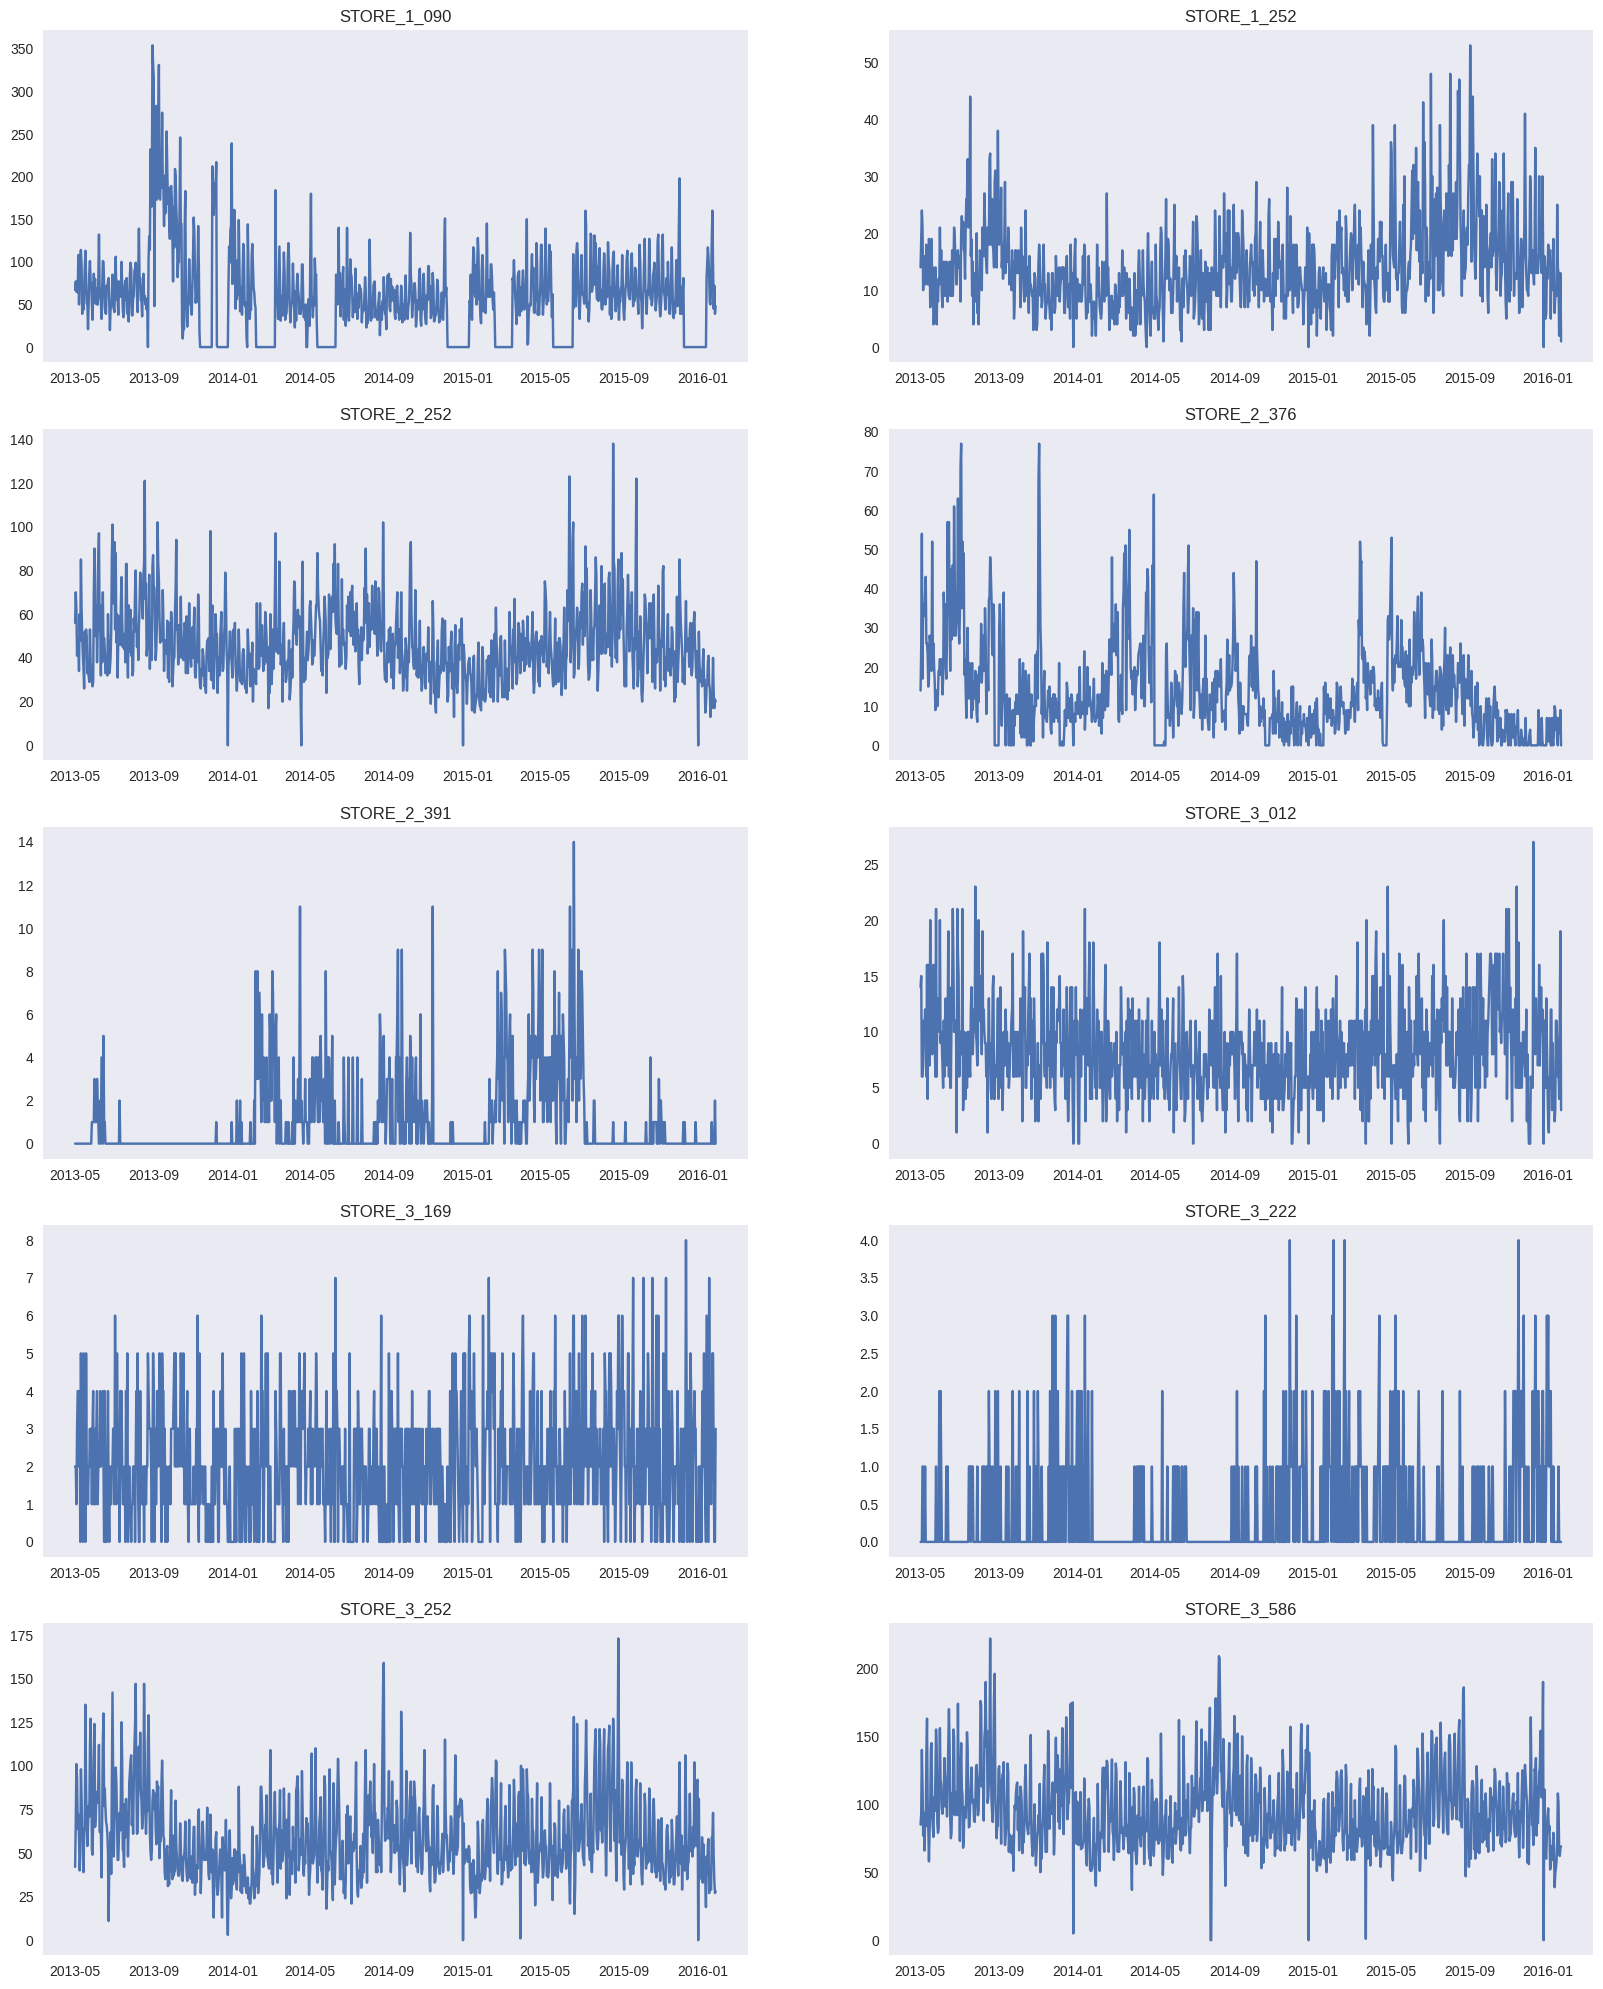

In [280]:
ts = TSDataset(df, freq="D")
ts.plot()

In [281]:
HORIZON = 30

In [282]:
train_ts, test_ts = ts.train_test_split(test_size=HORIZON)

In [283]:
from etna.transforms import LinearTrendTransform
from etna.transforms import SegmentEncoderTransform

# Define transforms
log = LogTransform(in_column="target")
trend = LinearTrendTransform(in_column="target")
seg = SegmentEncoderTransform()
lags = LagTransform(in_column="target", lags=list(range(HORIZON, 96)), out_column="lag")
date_flags = DateFlagsTransform(
    day_number_in_week=True,
    day_number_in_month=True,
    week_number_in_month=True,
    week_number_in_year=True,
    month_number_in_year=True,
    year_number=True,
    is_weekend=True,
)
mean = MeanTransform(in_column=f"lag_{HORIZON}", window=30)
transforms = [log, trend, lags, date_flags, seg, mean]

# Define a model
model = CatBoostMultiSegmentModel()

# Define a pipeline
pipeline = Pipeline(model=model, transforms=transforms, horizon=HORIZON)

# Fit the pipeline
pipeline.fit(train_ts)

# Make a forecast
forecast_ts = pipeline.forecast()

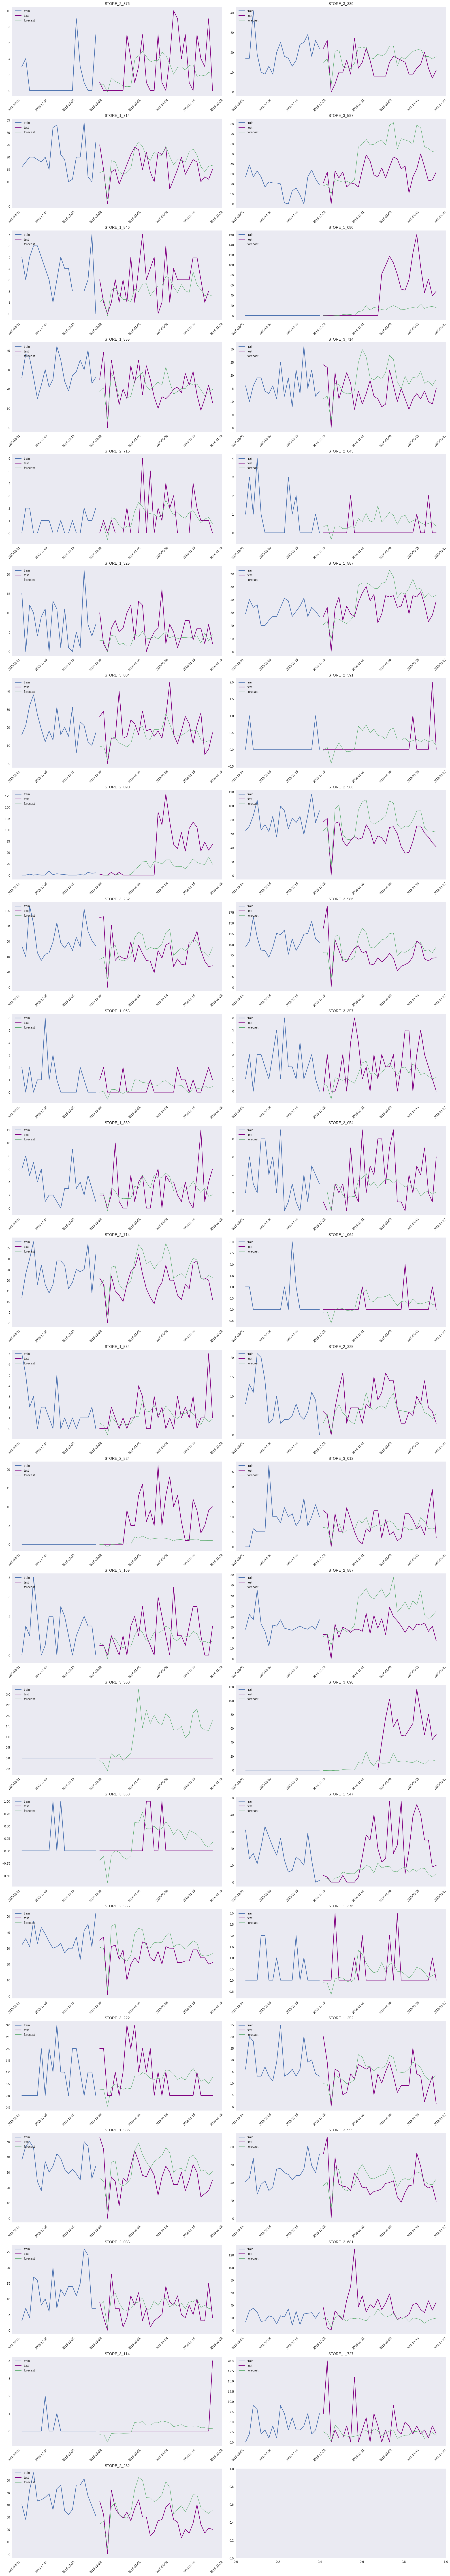

In [284]:
plot_forecast(forecast_ts=forecast_ts, test_ts=test_ts, train_ts=train_ts, n_train_samples=20)

In [287]:
mae_all_dataset = MAE(y_true=test_ts, y_pred=forecast_ts)

In [289]:
mae_all_dataset

{'STORE_1_064': 0.378307445947618,
 'STORE_1_065': 0.6922508585391921,
 'STORE_1_090': 36.46921478334795,
 'STORE_1_252': 5.393203628211671,
 'STORE_1_325': 3.7394556183072405,
 'STORE_1_339': 2.214112605614441,
 'STORE_1_376': 0.6259636344152759,
 'STORE_1_546': 1.4762803377515463,
 'STORE_1_547': 13.178051163808123,
 'STORE_1_555': 6.588026906072558,
 'STORE_1_584': 1.005102414791236,
 'STORE_1_586': 10.708528520179676,
 'STORE_1_587': 10.42384117459227,
 'STORE_1_714': 4.213726069761831,
 'STORE_1_727': 2.8194256403866707,
 'STORE_2_043': 0.663617145485232,
 'STORE_2_054': 2.309960403865593,
 'STORE_2_085': 3.5708301653756354,
 'STORE_2_090': 38.599003687695145,
 'STORE_2_252': 14.465105540064735,
 'STORE_2_325': 3.0662366412378197,
 'STORE_2_376': 2.8890854928839658,
 'STORE_2_391': 0.3663686152134357,
 'STORE_2_524': 5.89199003248506,
 'STORE_2_555': 7.72427099426178,
 'STORE_2_586': 22.51598071771414,
 'STORE_2_587': 17.63855109130395,
 'STORE_2_681': 19.78151954766138,
 'STORE_2

In [324]:
unique_segments = df['segment'].unique()

In [325]:
unique_segments

array(['STORE_2_085', 'STORE_2_043', 'STORE_2_054', 'STORE_2_325',
       'STORE_2_090', 'STORE_2_252', 'STORE_2_376', 'STORE_2_391',
       'STORE_2_524', 'STORE_2_555', 'STORE_2_586', 'STORE_2_587',
       'STORE_2_681', 'STORE_2_714', 'STORE_2_716', 'STORE_3_012',
       'STORE_3_114', 'STORE_3_357', 'STORE_3_360', 'STORE_3_090',
       'STORE_3_169', 'STORE_3_222', 'STORE_3_252', 'STORE_3_358',
       'STORE_3_389', 'STORE_3_555', 'STORE_3_586', 'STORE_3_587',
       'STORE_3_714', 'STORE_3_804', 'STORE_1_064', 'STORE_1_065',
       'STORE_1_325', 'STORE_1_376', 'STORE_1_090', 'STORE_1_252',
       'STORE_1_339', 'STORE_1_546', 'STORE_1_547', 'STORE_1_555',
       'STORE_1_584', 'STORE_1_586', 'STORE_1_587', 'STORE_1_714',
       'STORE_1_727'], dtype=object)

In [347]:
mae_one_datasets = {}
for segment in unique_segments:
  segment_data = df[df['segment'] == segment].copy()

  segment_ts = TSDataset(segment_data, freq="D")
  train_ts, test_ts = segment_ts.train_test_split(test_size=30)

  # Define transforms
  log = LogTransform(in_column="target")
  trend = LinearTrendTransform(in_column="target")
  seg = SegmentEncoderTransform()
  lags = LagTransform(in_column="target", lags=list(range(HORIZON, 96)), out_column="lag")
  date_flags = DateFlagsTransform(
      day_number_in_week=True,
       day_number_in_month=True,
      week_number_in_month=True,
      week_number_in_year=True,
      month_number_in_year=True,
      year_number=True,
      is_weekend=True,
  )

  mean = MeanTransform(in_column=f"lag_{HORIZON}", window=30)
  transforms = [log, trend, lags, date_flags, seg, mean]

  # Define a model
  model = CatBoostMultiSegmentModel()

  # Define a pipeline
  pipeline = Pipeline(model=model, transforms=transforms, horizon=HORIZON)

  # Fit the pipeline
  pipeline.fit(train_ts)

  # Make a forecast
  forecast_ts = pipeline.forecast()

  mae_one_datasets[segment] = mae(y_true=test_ts, y_pred=forecast_ts)[segment]



In [348]:
mae_one_datasets

{'STORE_2_085': 3.724224804108664,
 'STORE_2_043': 0.4593173217859723,
 'STORE_2_054': 2.583828126996477,
 'STORE_2_325': 3.800449614347924,
 'STORE_2_090': 44.136635503428685,
 'STORE_2_252': 9.753048029465736,
 'STORE_2_376': 3.035797683203614,
 'STORE_2_391': 0.5696925538808173,
 'STORE_2_524': 5.7002841672655995,
 'STORE_2_555': 5.856199729486922,
 'STORE_2_586': 17.509162494373825,
 'STORE_2_587': 22.13780360774104,
 'STORE_2_681': 16.24003524018055,
 'STORE_2_714': 7.1630588844225445,
 'STORE_2_716': 1.192683058817289,
 'STORE_3_012': 3.6919728062064014,
 'STORE_3_114': 0.18520737775423546,
 'STORE_3_357': 1.5706307015153127,
 'STORE_3_360': 2.1933641052937474,
 'STORE_3_090': 21.115149961143132,
 'STORE_3_169': 1.526347907119509,
 'STORE_3_222': 0.8287558795502609,
 'STORE_3_252': 13.162480260745268,
 'STORE_3_358': 0.18004260784583476,
 'STORE_3_389': 6.417776552387054,
 'STORE_3_555': 11.323061261315063,
 'STORE_3_586': 18.94086389983243,
 'STORE_3_587': 8.082432642651037,
 'S

In [ ]:
#

# Cравнение результатов обучения на всем датасете или отдельном сегменте

In [ ]:
df_one = pd.DataFrame(list(mae_one_datasets.items()), columns=['segment', 'MAE_One'])
df_all = pd.DataFrame(list(mae_all_dataset.items()), columns=['segment', 'MAE_All'])

# Merge the two datasets on 'Store'
df_comparison = pd.merge(df_one, df_all, on='segment')

# Sorting the data by the difference between the two for better visualization
df_comparison['MAE_Difference'] = df_comparison['MAE_One'] - df_comparison['MAE_All']
df_comparison = df_comparison.sort_values(by='MAE_Difference', ascending=False)


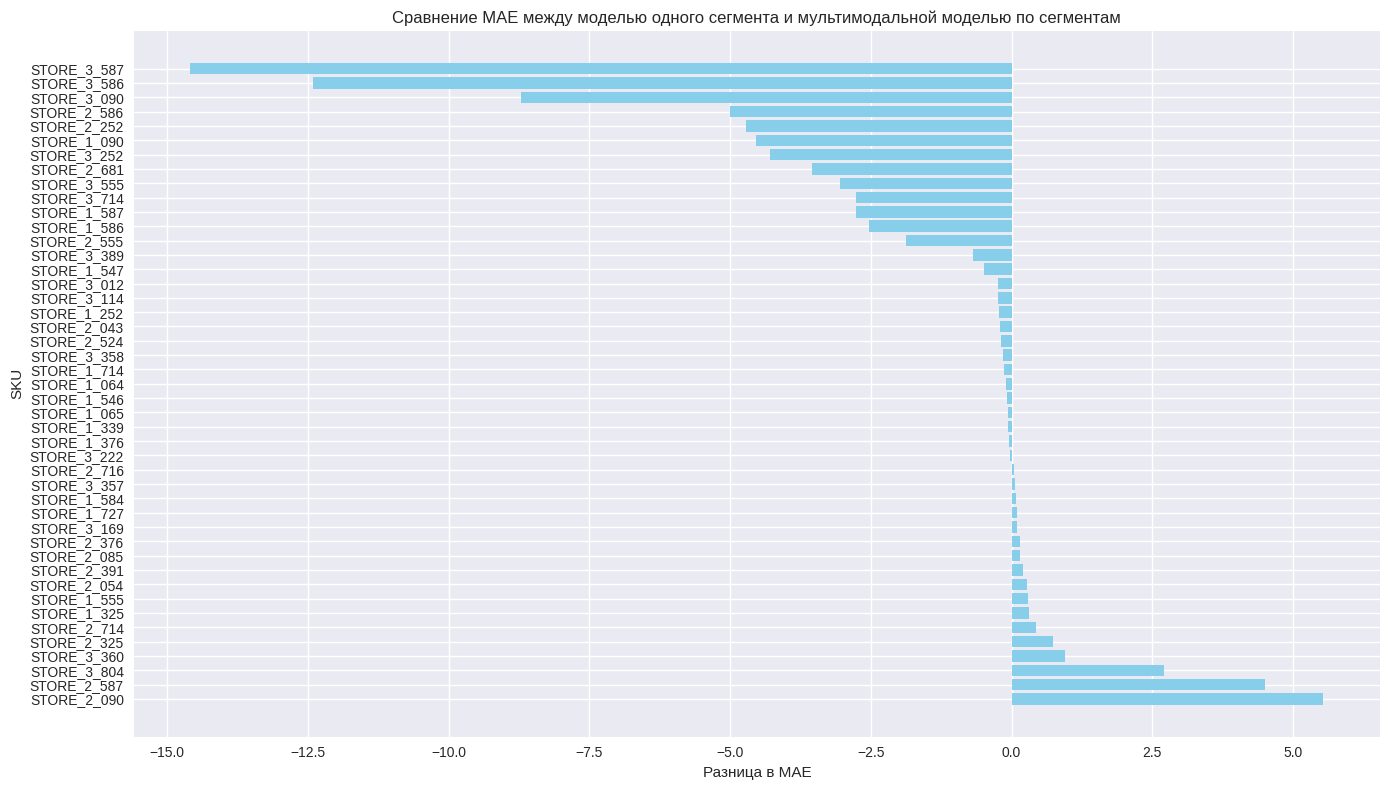

In [356]:
# Creating the plot again with Russian labels and titles
plt.figure(figsize=(14, 8))
plt.barh(df_comparison['segment'], df_comparison['MAE_Difference'], color='skyblue')
plt.xlabel('Разница в MAE')
plt.ylabel('SKU')
plt.title('Сравнение MAE между моделью одного сегмента и мультимодальной моделью по сегментам')
plt.grid(True)
plt.tight_layout()

# Show the updated chart with Russian labels
plt.show()


### **Вывод:** какие - то сегменты лучше предсказываются через общий датасет.